
# **Import and download the dataset from web**




In [554]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded successfully from web.')


Dataset downloaded successfully from web.


# Dataset loading and preprocessing

In [555]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [556]:
print(os.listdir(dataset))

['animals', 'images']


In [557]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [558]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [559]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [560]:

result = []
for category in categories:
    path = os.path.join(dataset, category)
    files = os.listdir(path)
    result.append(files)

print(result)





[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

Taking the First 100 images from each category

In [561]:
train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))



Loading cats: 100%|██████████| 100/100 [00:00<00:00, 706.13it/s]


In [562]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [563]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [564]:
np.random.shuffle(train_data)

In [565]:
print([train_data[i][1] for i in range(15)])

[2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1]


# Visualization

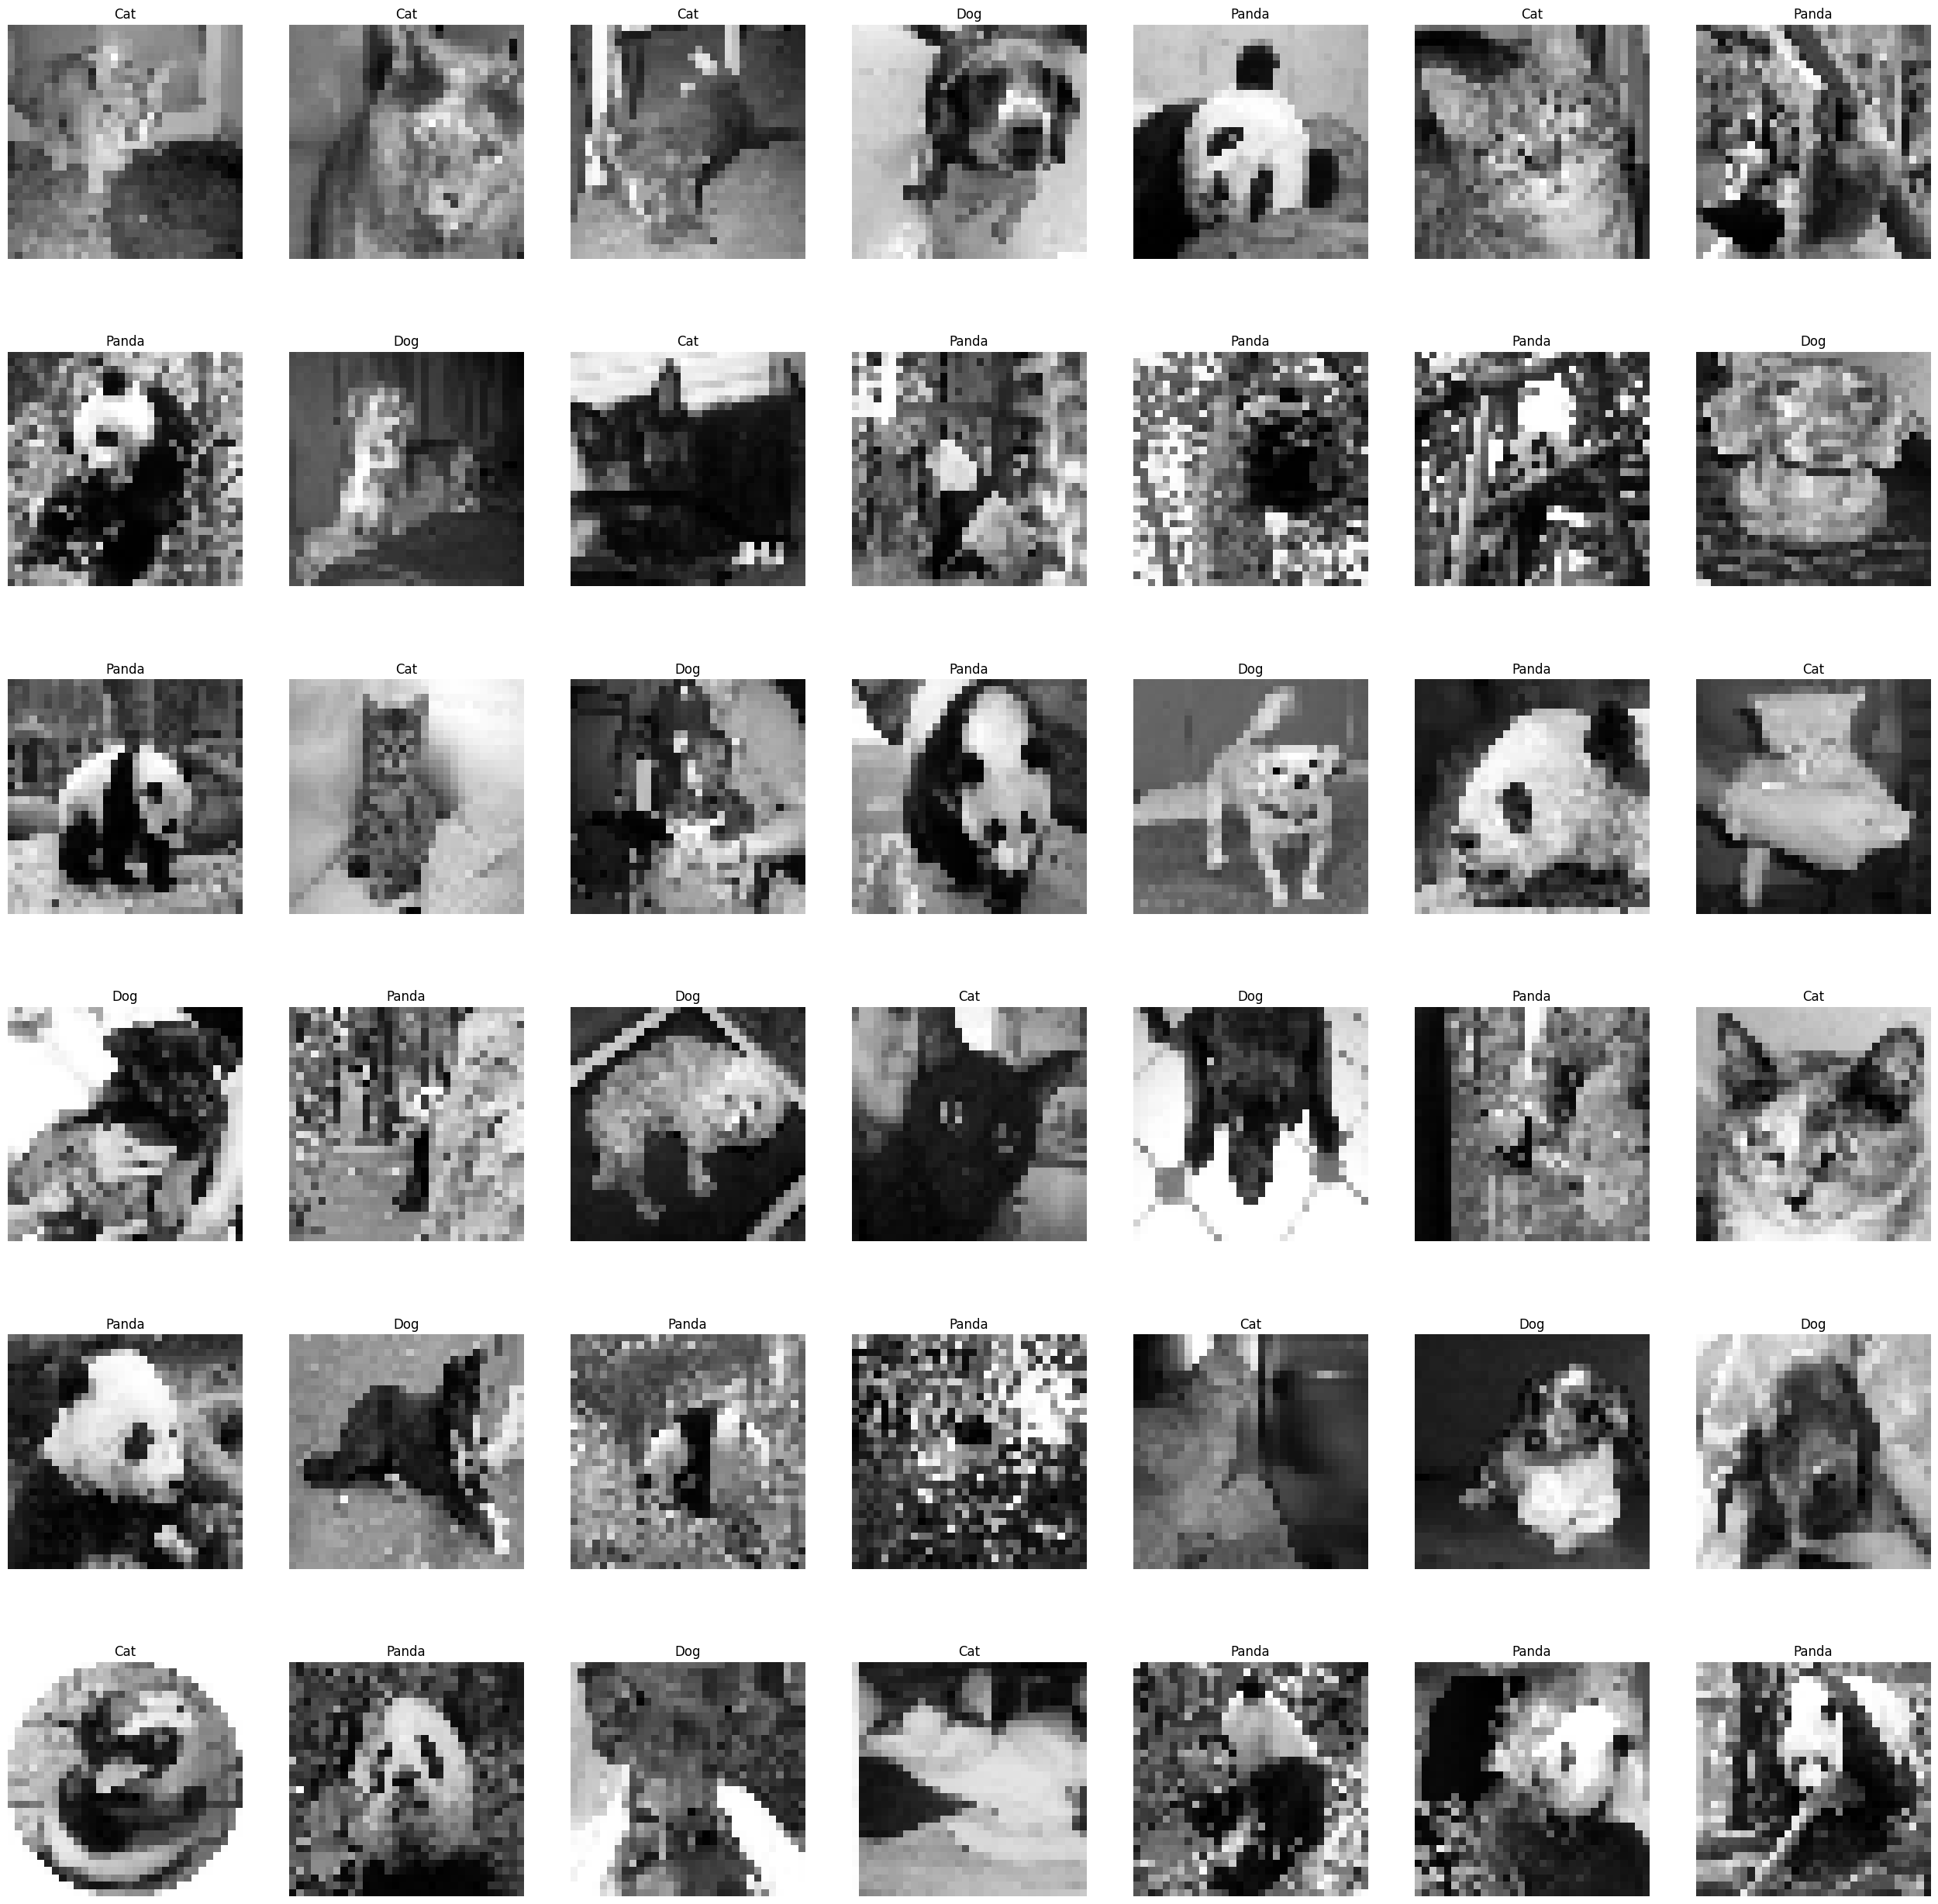

In [566]:
fig, axes = plt.subplots(6, 7, figsize=(32, 32))
label_names = ['Dog', 'Panda','Cat']
for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label_names[label])
    ax.axis('off')

plt.show()




# Cross-Validation


In [567]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [568]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0]
Count: 60
 
Fold 2:
Labels: [2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1]
Count: 60
 
Fold 3:
Labels: [2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0]
Count: 60
 
Fold 4:
Labels: [0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0]
Count: 60
 
Fold 5:
Labels: [1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 

# Calculating Euclidean Distance

In [569]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

# Calculating Manhattan Distance

In [570]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

# k-Nearest Neighbors (kNN) Prediction

In [571]:
def knn_prediction(distances, k=1):
    labels = []
    for i in range(k):
        _, label = distances[i]
        labels.append(label)


    label_freq = {}
    for label in labels:
        if label in label_freq:
            label_freq[label] += 1
        else:
            label_freq[label] = 1


    most_common_label = max(label_freq, key=label_freq.get)

    return most_common_label


# Euclidean Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

In [572]:
def evaluate_fold(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        l2_distances = [
            (l2_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        l2_distances.sort()
        predicted_label = knn_prediction(l2_distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

k_range = range(1, 31)
fold_accuracies_2, avg_accuracies_2 = cross_validate_knn(folds, k_range)

print("Fold Accuracies:", fold_accuracies_2)
print("Average Fold Accuracies:", avg_accuracies_2)


Evaluating K = 1
K: 1 Average Accuracy: 0.45
Evaluating K = 2
K: 2 Average Accuracy: 0.45
Evaluating K = 3
K: 3 Average Accuracy: 0.45
Evaluating K = 4
K: 4 Average Accuracy: 0.47
Evaluating K = 5
K: 5 Average Accuracy: 0.42
Evaluating K = 6
K: 6 Average Accuracy: 0.44
Evaluating K = 7
K: 7 Average Accuracy: 0.46
Evaluating K = 8
K: 8 Average Accuracy: 0.48
Evaluating K = 9
K: 9 Average Accuracy: 0.48
Evaluating K = 10
K: 10 Average Accuracy: 0.47
Evaluating K = 11
K: 11 Average Accuracy: 0.46
Evaluating K = 12
K: 12 Average Accuracy: 0.51
Evaluating K = 13
K: 13 Average Accuracy: 0.48
Evaluating K = 14
K: 14 Average Accuracy: 0.48
Evaluating K = 15
K: 15 Average Accuracy: 0.49
Evaluating K = 16
K: 16 Average Accuracy: 0.50
Evaluating K = 17
K: 17 Average Accuracy: 0.49
Evaluating K = 18
K: 18 Average Accuracy: 0.49
Evaluating K = 19
K: 19 Average Accuracy: 0.49
Evaluating K = 20
K: 20 Average Accuracy: 0.49
Evaluating K = 21
K: 21 Average Accuracy: 0.50
Evaluating K = 22
K: 22 Average

# Manhattan Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

---



In [573]:
def evaluate_fold_l1(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        distances = [
            (l1_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        distances.sort()
        predicted_label = knn_prediction(distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn_l1(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold_l1(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

k_range = range(1, 31)
fold_accuracies_1, avg_accuracies_1 = cross_validate_knn_l1(folds, k_range)

print("Fold Accuracies:", fold_accuracies_1)
print("Average Fold Accuracies:", avg_accuracies_1)


Evaluating K = 1
K: 1 Average Accuracy: 0.37
Evaluating K = 2
K: 2 Average Accuracy: 0.37
Evaluating K = 3
K: 3 Average Accuracy: 0.40
Evaluating K = 4
K: 4 Average Accuracy: 0.41
Evaluating K = 5
K: 5 Average Accuracy: 0.40
Evaluating K = 6
K: 6 Average Accuracy: 0.39
Evaluating K = 7
K: 7 Average Accuracy: 0.43
Evaluating K = 8
K: 8 Average Accuracy: 0.42
Evaluating K = 9
K: 9 Average Accuracy: 0.41
Evaluating K = 10
K: 10 Average Accuracy: 0.40
Evaluating K = 11
K: 11 Average Accuracy: 0.41
Evaluating K = 12
K: 12 Average Accuracy: 0.37
Evaluating K = 13
K: 13 Average Accuracy: 0.38
Evaluating K = 14
K: 14 Average Accuracy: 0.39
Evaluating K = 15
K: 15 Average Accuracy: 0.39
Evaluating K = 16
K: 16 Average Accuracy: 0.39
Evaluating K = 17
K: 17 Average Accuracy: 0.38
Evaluating K = 18
K: 18 Average Accuracy: 0.38
Evaluating K = 19
K: 19 Average Accuracy: 0.39
Evaluating K = 20
K: 20 Average Accuracy: 0.40
Evaluating K = 21
K: 21 Average Accuracy: 0.41
Evaluating K = 22
K: 22 Average

# Visualizing Cross-validation Accuracy (Graph Implementation)

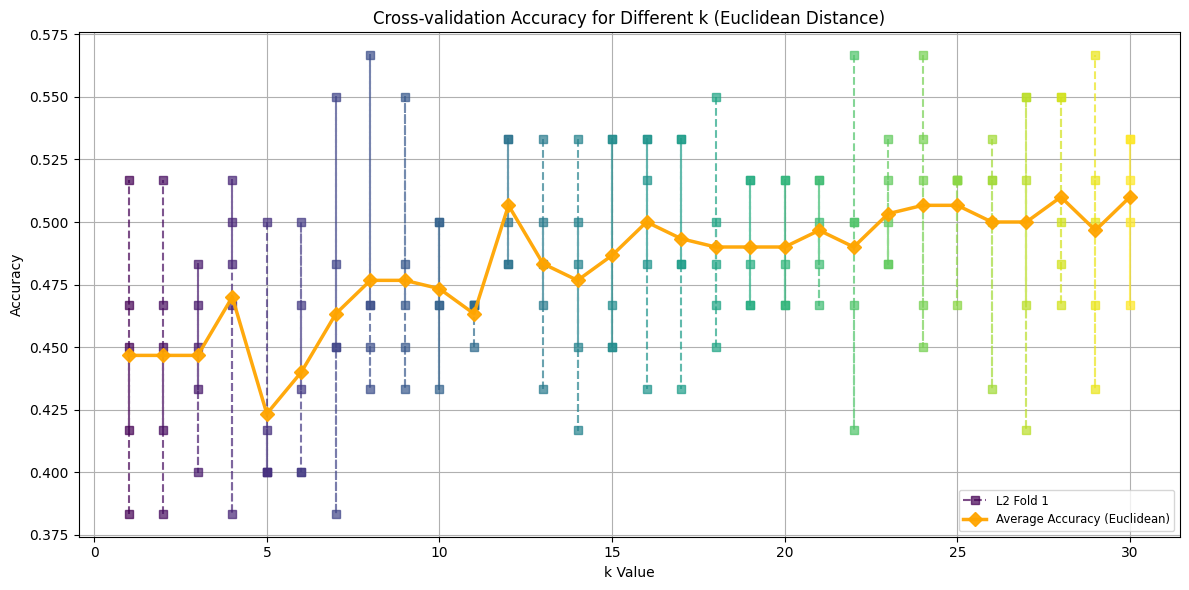

In [574]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 30))

for k in range(30):
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2,
             linestyle='--', marker='s', markersize=6, alpha=0.7,
             color=colors[k],
             label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_2,
         color='orange', alpha=0.95,
         label='Average Accuracy (Euclidean)',
         linestyle='-', linewidth=2.5, marker='D', markersize=7)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy for Different k (Euclidean Distance)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()



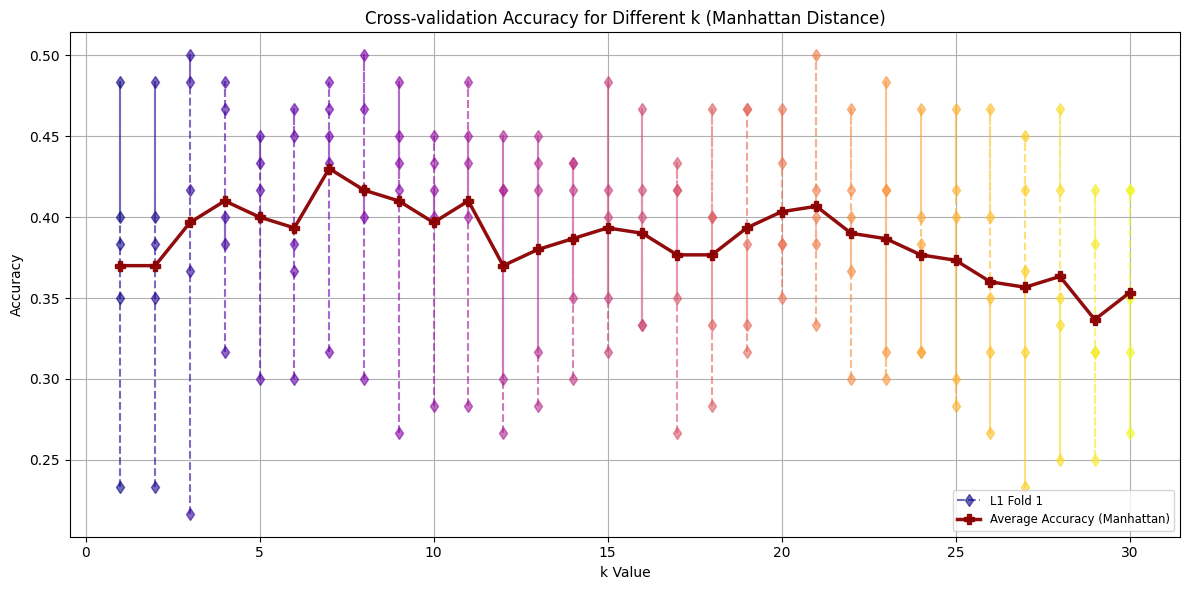

In [575]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, 30))

for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1,
             linestyle='--', marker='d', markersize=6, alpha=0.6,
             color=colors[k],
             label=f'L1 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_1,
         color='darkred', alpha=0.95,
         label='Average Accuracy (Manhattan)',
         linestyle='-', linewidth=2.5, marker='P', markersize=7)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy for Different k (Manhattan Distance)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()



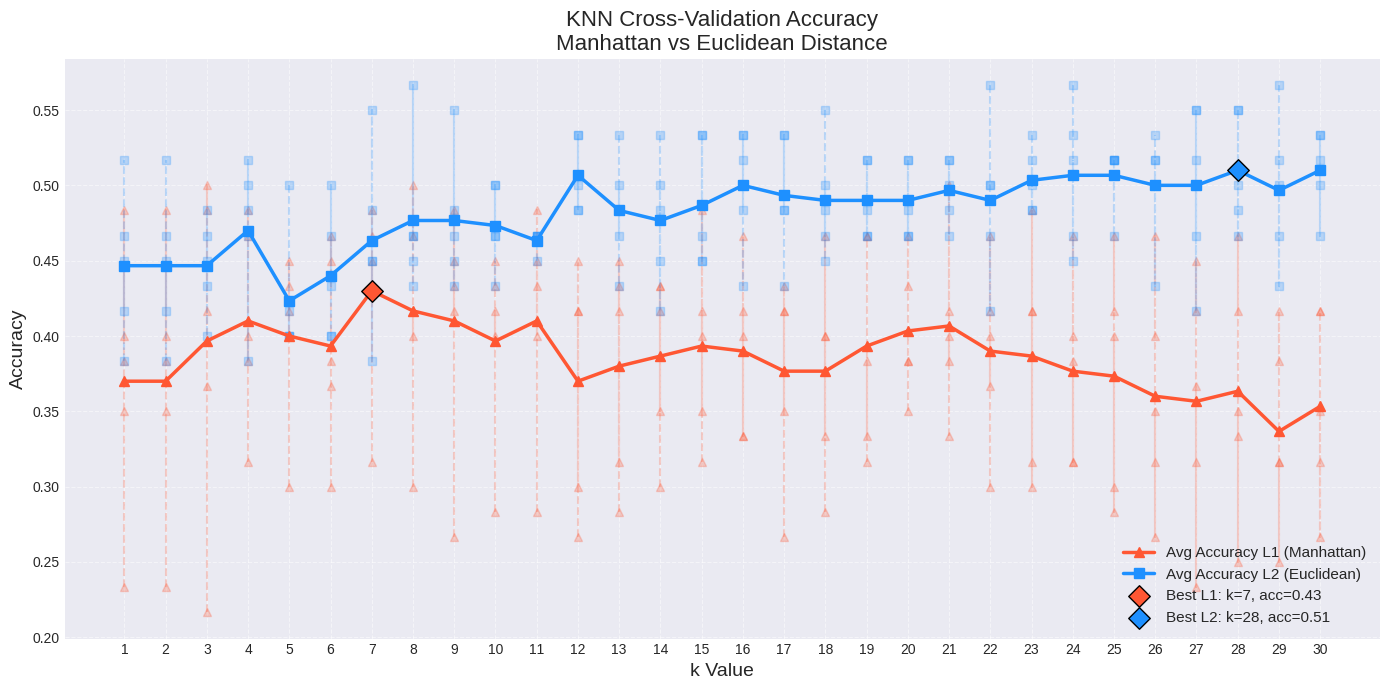

In [591]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

l1_color = '#FF5733'
l2_color = '#1E90FF'
fold_alpha = 0.25
avg_alpha = 0.95

for k in range(30):
    plt.plot([k + 1] * len(fold_accuracies_1[k]), fold_accuracies_1[k],
             linestyle='--', marker='^', alpha=fold_alpha,
             color=l1_color)

for k in range(30):
    plt.plot([k + 1] * len(fold_accuracies_2[k]), fold_accuracies_2[k],
             linestyle='--', marker='s', alpha=fold_alpha,
             color=l2_color)

plt.plot(range(1, 31), avg_accuracies_1,
         color=l1_color, linestyle='-', linewidth=2.5,
         marker='^', markersize=7, label='Avg Accuracy L1 (Manhattan)')

plt.plot(range(1, 31), avg_accuracies_2,
         color=l2_color, linestyle='-', linewidth=2.5,
         marker='s', markersize=7, label='Avg Accuracy L2 (Euclidean)')

best_k_l1 = np.argmax(avg_accuracies_1) + 1
best_acc_l1 = max(avg_accuracies_1)
plt.scatter(best_k_l1, best_acc_l1, color=l1_color, s=120, marker='D', edgecolors='black', zorder=5,
            label=f'Best L1: k={best_k_l1}, acc={best_acc_l1:.2f}')

best_k_l2 = np.argmax(avg_accuracies_2) + 1
best_acc_l2 = max(avg_accuracies_2)
plt.scatter(best_k_l2, best_acc_l2, color=l2_color, s=120, marker='D', edgecolors='black', zorder=5,
            label=f'Best L2: k={best_k_l2}, acc={best_acc_l2:.2f}')

plt.xlabel('k Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('KNN Cross-Validation Accuracy\nManhattan vs Euclidean Distance', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 31))
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()

plt.show()


# predictions Euclidean

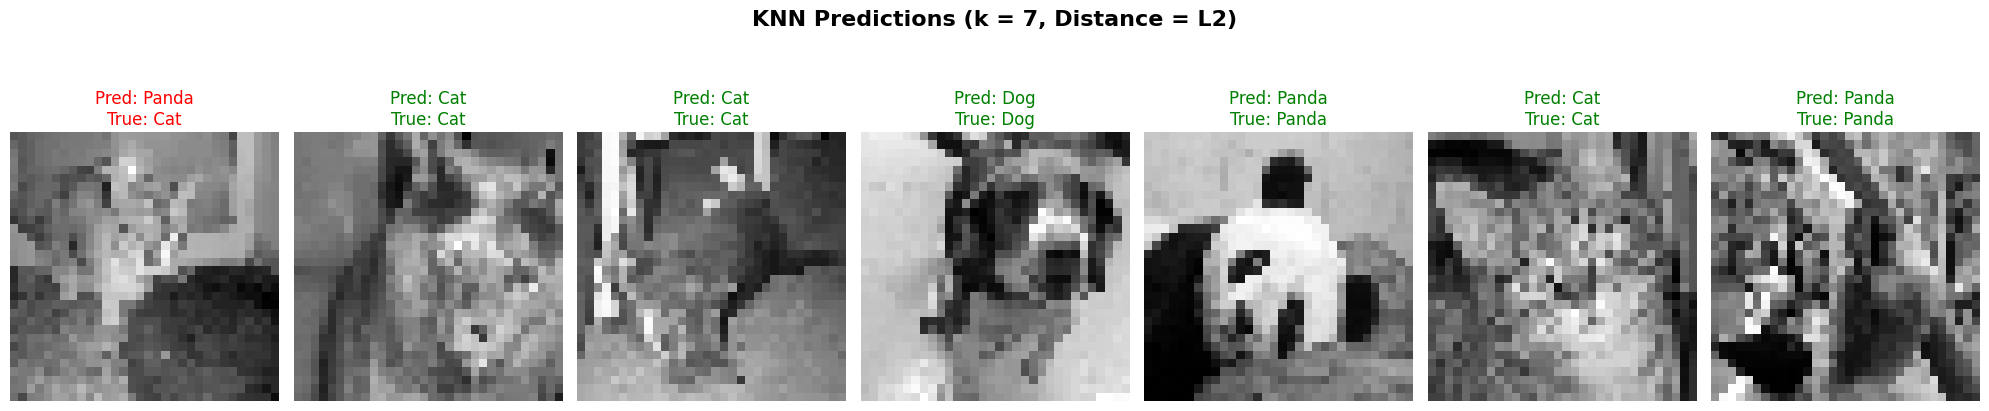

In [584]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l2_distance
label_names = ['Dog', 'Panda', 'Cat']

fig, axes = plt.subplots(1, len(test_samples), figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    color = 'green' if predicted_label == true_label else 'red'
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color=color)
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


#  predictions Manhattan

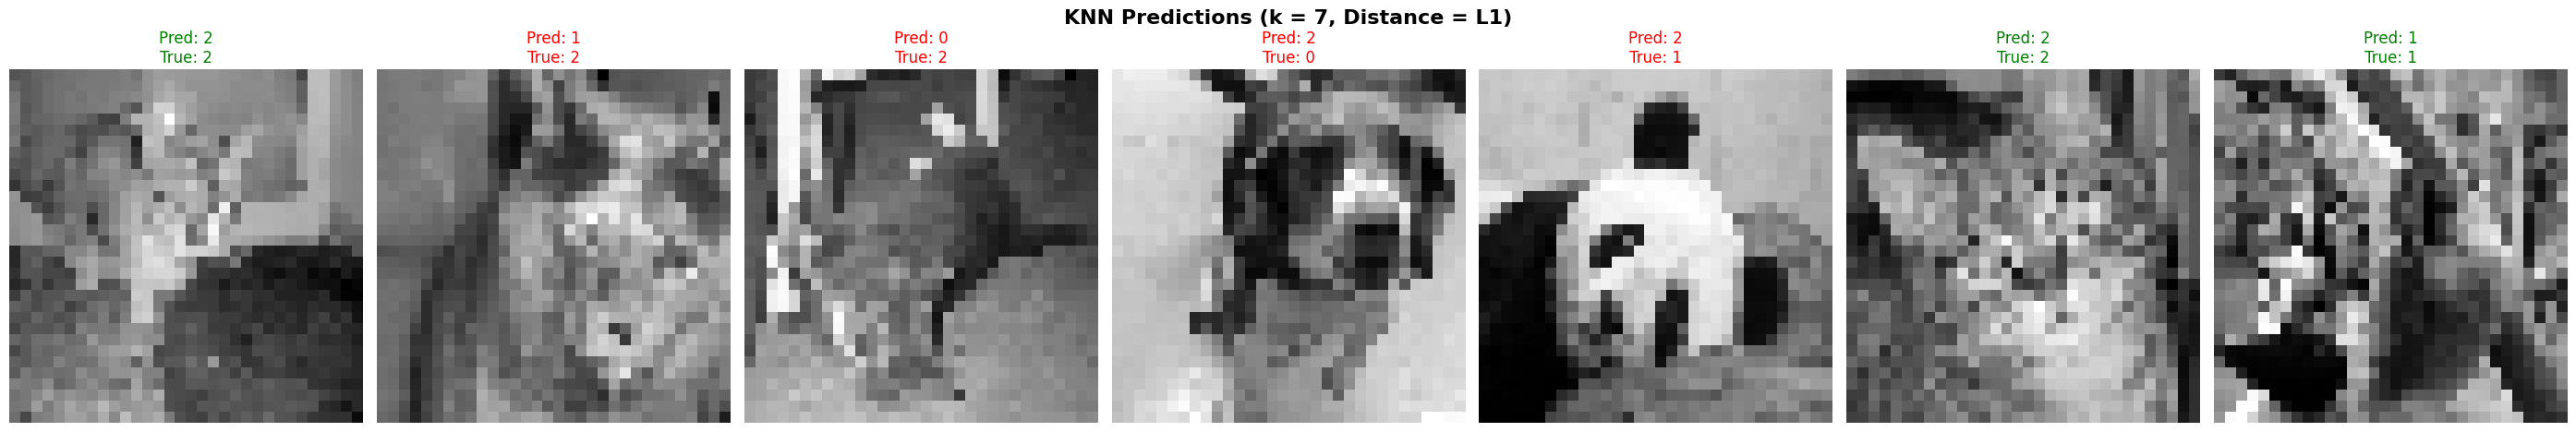

In [585]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l1_distance


fig, axes = plt.subplots(1, len(test_samples), figsize=(4 * len(test_samples), 5))

if len(test_samples) == 1:
    axes = [axes]

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}",
                        color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})",
             fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# Discussion about result
The comparative analysis between Euclidean (L2) and Manhattan (L1) distance metrics in k-NN classification reveals distinct differences in performance across varying values of K. Based on the 5-fold cross-validation results, Euclidean distance consistently outperformed Manhattan distance, achieving its highest average accuracy of 51% at K = 28. In contrast, the Manhattan distance peaked earlier, reaching a maximum accuracy of 43% at K = 7, indicating it may be more effective at lower K-values but generally less reliable as K increases.

These differences arise from how each distance function captures pixel-level variation in grayscale 32×32 images. Euclidean distance (L2), which penalizes larger discrepancies more heavily, is better at detecting subtle variations in shape and intensity — a critical factor when classifying visually similar animal images such as cats, dogs, and pandas. Manhattan distance (L1), by treating all pixel differences linearly, tends to be more uniform and potentially more noise-tolerant, but lacks the sensitivity needed to distinguish fine structural features in images.

The trend across increasing values of K also highlights the smoothing effect of larger neighborhoods. Higher K-values reduce overfitting by incorporating broader context, which explains the improved accuracy of both metrics at their respective optimal K. However, the reliance on raw pixel features remains a fundamental limitation, as it restricts the model's ability to abstract spatial or semantic patterns essential for deeper visual understanding.

Despite its simplicity and interpretability, the k-NN algorithm suffers from key drawbacks in this context:

High computational cost during inference, since every test image is compared against all training samples.

Weak feature representation, as the model directly uses unprocessed pixel data without extracting meaningful features.